In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification   # creating a n-classification problem

In [2]:
X,Y = make_classification( n_samples=100, # default is 100
                          n_features= 10, # The total number of features (column). These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random
                          n_redundant=0, # The number of redundant features.
                          n_informative= 5, # The number of informative features.
                          n_clusters_per_class= 1) # The number of clusters per class

In [3]:
df = pd.DataFrame (data= X, columns= ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10'])
df['label'] = Y
df.head(5)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,label
0,-0.171038,0.417807,-0.071216,-2.469434,1.471714,-0.345621,-2.161815,2.994234,-0.457218,0.620299,0
1,0.262095,0.981224,-0.499375,1.947137,-0.911015,-0.578855,-3.204116,1.317544,0.806279,0.100039,1
2,0.194398,0.832941,0.109554,0.703452,-1.376074,-0.435610,-3.343756,0.788250,1.078222,0.461272,0
3,-0.657507,1.348355,0.534464,2.357951,0.927365,0.504899,-1.680976,0.366988,0.065846,-0.010566,1
4,0.035531,0.990616,0.863810,-3.260579,1.031670,0.247945,-0.295546,-0.950884,0.479792,-0.328521,1


**1. Row sampling**

In [4]:
# fucntion for row sampling 
def row_sampling(df, percent):
    return df.sample(int(percent * df.shape[0]))

In [5]:
# creating 3 subsets of the datasets
df_row1 = row_sampling(df, .50)
df_row2 = row_sampling(df, .50)
df_row3 = row_sampling(df, .50)
df_row1.head(10)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,label
32,1.366201,1.225840,-0.683114,2.739078,0.709028,-0.857255,-0.689524,2.618903,-1.067537,0.665761,1
46,0.415718,-0.574352,0.335133,2.977016,-4.804838,-0.563882,-1.588529,-1.834409,-0.348258,-0.429255,0
18,0.265578,2.688348,0.214712,0.421886,1.457809,-0.873386,1.680624,2.335689,0.221681,1.876396,1
71,-0.334006,-0.277696,-0.451826,-0.358216,-1.649075,2.075109,-2.532514,0.952437,0.016604,-1.146895,0
55,1.154413,1.166740,0.823948,-0.185166,-1.352791,-0.498915,-2.695460,0.756693,0.349307,-2.788934,0
86,-0.657723,0.413287,-1.033209,1.892231,0.786897,1.655243,-1.685053,1.207312,1.051994,1.861066,1
36,-1.029366,-1.402512,-1.302818,-2.804807,1.045226,0.784723,-1.203815,2.306370,1.379105,-0.802009,0
69,0.324608,-1.830939,0.849217,-2.959639,1.273402,1.729173,-0.928343,2.400186,0.905352,0.513331,0
5,0.222291,0.344831,0.045827,2.092334,1.362855,-0.403683,-0.441182,2.706229,-1.266382,0.428513,1
97,-0.473568,0.247897,0.192797,0.428751,1.877603,0.091083,-0.108847,0.677225,0.109124,-0.149064,1


In [6]:
# creating DT classifier class
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [7]:
# training the model
clf1.fit(df_row1.iloc[: ,0:10], df_row1.iloc[:, -1])
clf2.fit(df_row2.iloc[: ,0:10], df_row2.iloc[:, -1])
clf3.fit(df_row3.iloc[: ,0:10], df_row3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5, 0.875, 'x[1] <= -0.173\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.625, 'x[3] <= 3.009\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.625, 'x[4] <= 0.306\ngini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.625, 0.375, 'x[7] <= 2.144\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]')]

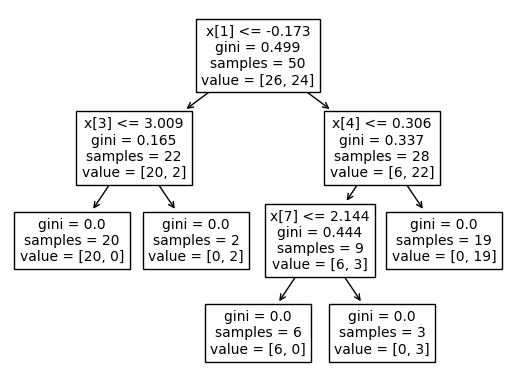

In [8]:
# viewing the tree
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.875, 'x[4] <= -0.557\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.25, 0.625, 'x[7] <= 1.818\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'x[3] <= -1.111\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.625, 0.375, 'x[0] <= 0.568\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]')]

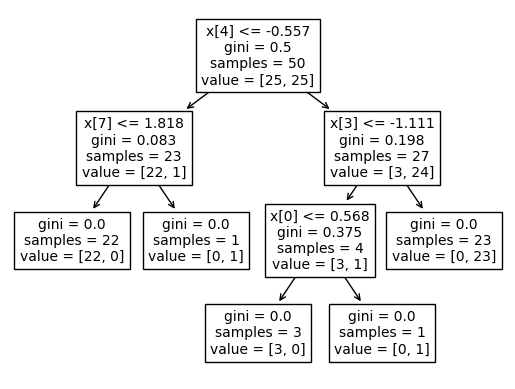

In [9]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9, 'x[4] <= 0.673\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3333333333333333, 0.7, 'x[7] <= 2.481\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.537\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.3333333333333333, 0.3, 'x[3] <= 2.301\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.7, 'x[3] <= -2.324\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.6666666666666666, 0.5, 'x[8] <= 0.693\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.3, 'gini = 0.0\nsamples = 3\nvalue 

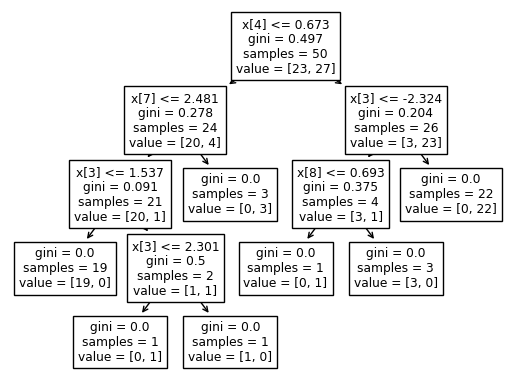

In [10]:
plot_tree(clf3)

In [11]:
# predictions
import numpy as np
clf1.predict((np.array([-1.184427,	-2.064145,	1.110873,	0.466765,	2.107996,	1.616948,	-0.008604,	0.509975,0.700025,-1.046384	]).reshape(1,10)))
# output is 1 as present in the main dataset. 

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [12]:
# 3rd model is also predicting it to be 1
clf3.predict((np.array([-1.184427,	-2.064145,	1.110873,	0.466765,	2.107996,	1.616948,	-0.008604,	0.509975,0.700025,-1.046384	]).reshape(1,10)))

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [13]:
# 2nd model is also predicitng it to be 1
clf2.predict((np.array([-1.184427,	-2.064145,	1.110873,	0.466765,	2.107996,	1.616948,	-0.008604,	0.509975,0.700025,-1.046384	]).reshape(1,10)))

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

> As all three model showing 1 as output thus label of the query point will be 1. (Classification problem)

**2. Feature or Column sampling**

In [14]:
# fucntion for feature sampling
#def feature_sampling(df, prop):
 #   df_features = df.sample(int(prop * df.shape[1]), axis= 1)
  #  df_features['target'] = df.iloc[:, -1]   # target/label column should be there always
   # return df_features

In [15]:
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df.iloc[:, -1]
  return new_df

In [16]:
# creating feature_Sampling datasets
df_feature_Sampling1 =sample_features(df, 0.5)
df_feature_Sampling2 =sample_features(df, 0.5)
df_feature_Sampling3 =sample_features(df, 0.5)
df_feature_Sampling1.head(5)

C:\Users\sanju\AppData\Local\Temp\ipykernel_10068\378441470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df.iloc[:, -1]
C:\Users\sanju\AppData\Local\Temp\ipykernel_10068\378441470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df.iloc[:, -1]
C:\Users\sanju\AppData\Local\Temp\ipykernel_10068\378441470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,col9,col8,col6,col1,col3,target
0,-0.457218,2.994234,-0.345621,-0.171038,-0.071216,0
1,0.806279,1.317544,-0.578855,0.262095,-0.499375,1
2,1.078222,0.788250,-0.435610,0.194398,0.109554,0
3,0.065846,0.366988,0.504899,-0.657507,0.534464,1
4,0.479792,-0.950884,0.247945,0.035531,0.863810,1


In [17]:
# diffrent columns assigned to different variable
print(df_feature_Sampling1.columns)
print(df_feature_Sampling2.columns)
print(df_feature_Sampling3.columns)

Index(['col9', 'col8', 'col6', 'col1', 'col3', 'target'], dtype='object')
Index(['col1', 'col7', 'col5', 'col6', 'col9', 'target'], dtype='object')
Index(['col4', 'col2', 'col6', 'col7', 'col1', 'target'], dtype='object')


In [18]:
# training the model
clf1.fit(df_feature_Sampling1.iloc[: ,0:5], df_feature_Sampling1.iloc[:, -1])
clf2.fit(df_feature_Sampling2.iloc[: ,0:5], df_feature_Sampling2.iloc[:, -1])
clf3.fit(df_feature_Sampling3.iloc[: ,0:5], df_feature_Sampling3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.4144736842105263, 0.95, 'x[2] <= -0.571\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.17105263157894737, 0.85, 'x[4] <= -0.113\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.10526315789473684, 0.75, 'x[0] <= 1.234\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.07894736842105263, 0.65, 'x[0] <= -1.116\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.05263157894736842, 0.55, 'x[4] <= -1.632\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.02631578947368421, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07894736842105263, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.55, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.13157894736842105, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23684210526315788, 0.75, 'x[1] <= 0.98\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.18421052631578946, 0.65, 'x[4] <= 1.809\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.157894736842

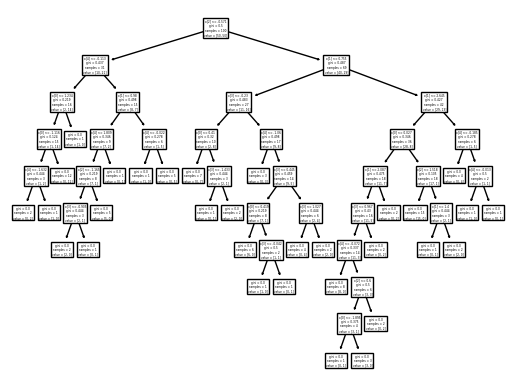

In [19]:
plot_tree(clf1)

[Text(0.390625, 0.9285714285714286, 'x[2] <= 0.061\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[1] <= -2.984\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[2] <= -1.28\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.125, 0.5, 'x[4] <= -0.926\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.25, 0.6428571428571429, 'x[3] <= -2.048\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.20833333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2916666666666667, 0.5, 'x[0] <= 2.008\ngini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'

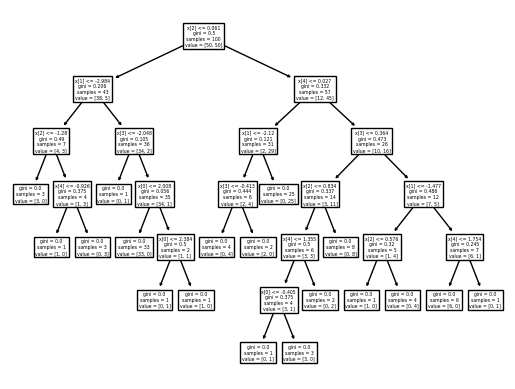

In [20]:
plot_tree(clf2)

[Text(0.5357142857142857, 0.9444444444444444, 'x[1] <= 0.033\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3392857142857143, 0.8333333333333334, 'x[0] <= 3.009\ngini = 0.359\nsamples = 47\nvalue = [36, 11]'),
 Text(0.30357142857142855, 0.7222222222222222, 'x[4] <= 0.417\ngini = 0.32\nsamples = 45\nvalue = [36, 9]'),
 Text(0.10714285714285714, 0.6111111111111112, 'x[2] <= -1.956\ngini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.5, 'x[4] <= -2.107\ngini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(0.10714285714285714, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17857142857142858, 0.3888888888888889, 'x[0] <= 1.268\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(0.10714285714285714, 0.2777777777777778, 'x[2] <= -0.562\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(0.07142857142857142, 0.16666666666666666, 'x[2] <= -0.711\ngini = 0.278\

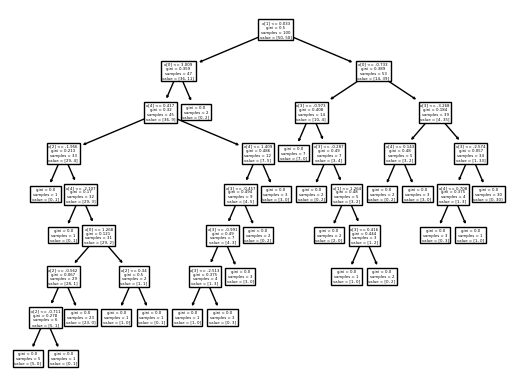

In [21]:
plot_tree(clf3)

In [22]:
# prediction using a query point
clf1.predict(np.array([0.325302,	-0.091563,	0.467215,	-0.571819,	0.214057]).reshape(1,5))

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
# prediction using a query point
clf2.predict(np.array([0.325302,	-0.091563,	0.467215,	-0.571819,	0.214057]).reshape(1,5))

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [24]:
# prediction using a query point
clf3.predict(np.array([0.325302,	-0.091563,	0.467215,	-0.571819,	0.214057]).reshape(1,5))

C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

> out of 3 classifier, two classifier is saying 1 and one is saying zero. Thus, as per majority value, label of the query point will be 1.

***3. Combined Sampling***